In [93]:
#корреляция между признаками в массиве данных gdelt

In [94]:
#импорт
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [95]:
#получение данных

#сам датафрейм
df = pd.read_csv('../data/gdelt_counts_event_by_day.csv', delimiter=',');

#названия столбцов
cameo = pd.read_csv('../data/gdelt_eventcodes.txt', sep='\t');

#устанавливаем индексы
df = df.set_index('date')
cameo = cameo.set_index('CAMEOEVENTCODE')

#удаляем лишнее и преобразуем формат
df = df.drop('Unnamed: 0', axis=1)
df = df.drop('0', axis=1)
cameo.index = cameo.index.map(str)

#переименовываем
df_rename = df.rename(columns=cameo.to_dict()['EVENTDESCRIPTION'])

#заполняем пустые строки
df_rename = df_rename.fillna(0)

#меняем формат индекса
df_rename.index =  pd.to_datetime(df_rename.index, format="%Y_%m_%d")

In [96]:
#вычисляем корреляцию
pearsoncorr = df_rename.corr()

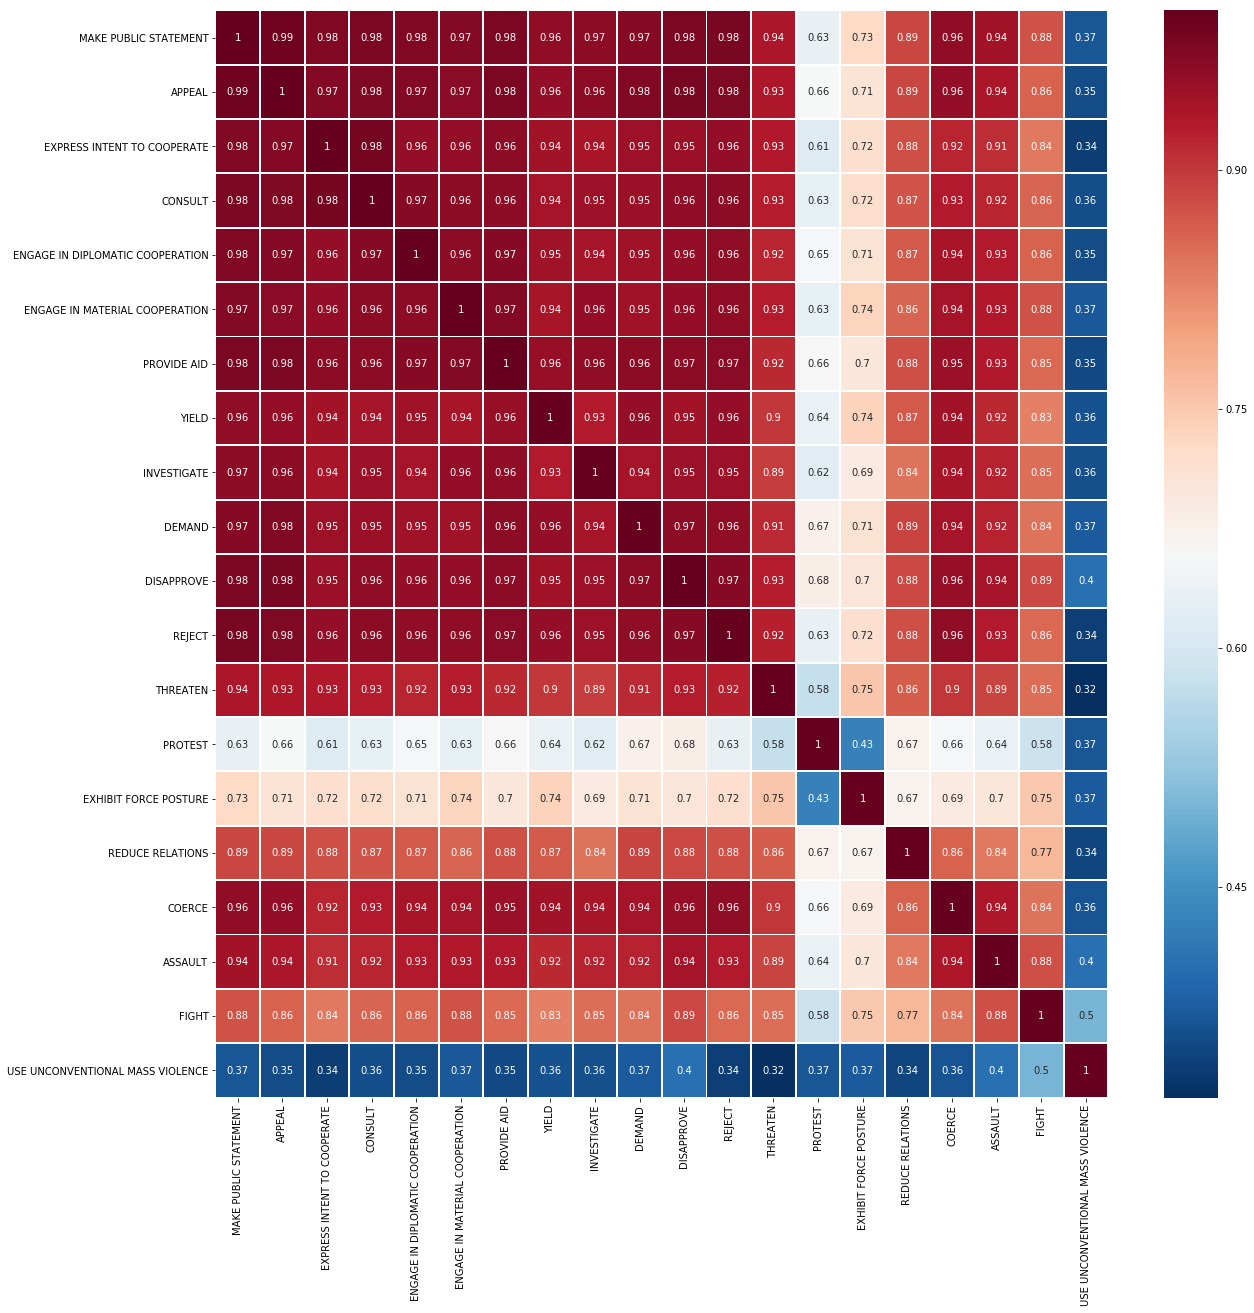

In [97]:
#сделаем побольше размер графика
fig, ax = plt.subplots(figsize=(20,20))

#и выведем сам график
sb.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',
            annot=True,
            ax=ax,
            linewidth=0.9)

In [98]:
#как можно заметить большой практически единый блок сильно скоррелированных признаков
#отличаются только "PROTEST", "EXHIBIT FORCE POSTURE", "USE UNCONVENTIONAL MASS VIOLENCE"

In [99]:
#попробуем вывести в виде таблицы, чтобы посмотреть минимум и максимум по корреляции

corr = df_rename.corr().abs()

corr_unstack = corr.unstack().sort_values(kind="quicksort")
corr_unstack_dataframe = pd.DataFrame(corr_unstack).reset_index().rename(columns={"level_0": "x", "level_1": "y", 0: "corr"})

In [100]:
corr_unstack_dataframe

x                                 y  \
0    USE UNCONVENTIONAL MASS VIOLENCE                          THREATEN   
1                            THREATEN  USE UNCONVENTIONAL MASS VIOLENCE   
2    USE UNCONVENTIONAL MASS VIOLENCE       EXPRESS INTENT TO COOPERATE   
3         EXPRESS INTENT TO COOPERATE  USE UNCONVENTIONAL MASS VIOLENCE   
4    USE UNCONVENTIONAL MASS VIOLENCE                            REJECT   
5                              REJECT  USE UNCONVENTIONAL MASS VIOLENCE   
6                    REDUCE RELATIONS  USE UNCONVENTIONAL MASS VIOLENCE   
7    USE UNCONVENTIONAL MASS VIOLENCE                  REDUCE RELATIONS   
8    USE UNCONVENTIONAL MASS VIOLENCE                       PROVIDE AID   
9                         PROVIDE AID  USE UNCONVENTIONAL MASS VIOLENCE   
10                             APPEAL  USE UNCONVENTIONAL MASS VIOLENCE   
11   USE UNCONVENTIONAL MASS VIOLENCE                            APPEAL   
12   USE UNCONVENTIONAL MASS VIOLENCE  ENGAGE IN DIPLOMATIC COOPERATION   
13   ENGAGE IN DIPLOMATIC COOPERATION  USE UNCONVENTIONAL MASS VIOLENCE   
14   USE UNCONVENTIONAL MASS VIOLENCE                           CONSULT   
15                            CONSULT  USE UNCONVENTIONAL MASS VIOLENCE   
16   USE UNCONVENTIONAL MASS VIOLENCE                       INVESTIGATE   
17                        INVESTIGATE  USE UNCONVENTIONAL MASS VIOLENCE   
18   USE UNCONVENTIONAL MASS VIOLENCE                             YIELD   
19                              YIELD  USE UNCONVENTIONAL MASS VIOLENCE   
20   USE UNCONVENTIONAL MASS VIOLENCE                            COERCE   
21                             COERCE  USE UNCONVENTIONAL MASS VIOLENCE   
22   USE UNCONVENTIONAL MASS VIOLENCE             MAKE PUBLIC STATEMENT   
23              MAKE PUBLIC STATEMENT  USE UNCONVENTIONAL MASS VIOLENCE   
24                            PROTEST  USE UNCONVENTIONAL MASS VIOLENCE   
25   USE UNCONVENTIONAL MASS VIOLENCE                           PROTEST   
26     ENGAGE IN MATERIAL COOPERATION  USE UNCONVENTIONAL MASS VIOLENCE   
27   USE UNCONVENTIONAL MASS VIOLENCE    ENGAGE IN MATERIAL COOPERATION   
28                             DEMAND  USE UNCONVENTIONAL MASS VIOLENCE   
29   USE UNCONVENTIONAL MASS VIOLENCE                            DEMAND   
..                                ...                               ...   
370                           CONSULT             MAKE PUBLIC STATEMENT   
371             MAKE PUBLIC STATEMENT                           CONSULT   
372                        DISAPPROVE                            APPEAL   
373                            APPEAL                        DISAPPROVE   
374             MAKE PUBLIC STATEMENT                            REJECT   
375                            REJECT             MAKE PUBLIC STATEMENT   
376       EXPRESS INTENT TO COOPERATE                           CONSULT   
377                           CONSULT       EXPRESS INTENT TO COOPERATE   
378             MAKE PUBLIC STATEMENT                            APPEAL   
379                            APPEAL             MAKE PUBLIC STATEMENT   
380             MAKE PUBLIC STATEMENT             MAKE PUBLIC STATEMENT   
381                           ASSAULT                           ASSAULT   
382                            APPEAL                            APPEAL   
383       EXPRESS INTENT TO COOPERATE       EXPRESS INTENT TO COOPERATE   
384                           CONSULT                           CONSULT   
385  ENGAGE IN DIPLOMATIC COOPERATION  ENGAGE IN DIPLOMATIC COOPERATION   
386    ENGAGE IN MATERIAL COOPERATION    ENGAGE IN MATERIAL COOPERATION   
387                       PROVIDE AID                       PROVIDE AID   
388                             YIELD                             YIELD   
389                             FIGHT                             FIGHT   
390                       INVESTIGATE                       INVESTIGATE   
391                        DISAPPROVE                        

In [101]:
#также можно изучить какой-нибудь конкретный признак
corr_unstack_dataframe[corr_unstack_dataframe['x'] == 'USE UNCONVENTIONAL MASS VIOLENCE']

x                                 y  \
0    USE UNCONVENTIONAL MASS VIOLENCE                          THREATEN   
2    USE UNCONVENTIONAL MASS VIOLENCE       EXPRESS INTENT TO COOPERATE   
4    USE UNCONVENTIONAL MASS VIOLENCE                            REJECT   
7    USE UNCONVENTIONAL MASS VIOLENCE                  REDUCE RELATIONS   
8    USE UNCONVENTIONAL MASS VIOLENCE                       PROVIDE AID   
11   USE UNCONVENTIONAL MASS VIOLENCE                            APPEAL   
12   USE UNCONVENTIONAL MASS VIOLENCE  ENGAGE IN DIPLOMATIC COOPERATION   
14   USE UNCONVENTIONAL MASS VIOLENCE                           CONSULT   
16   USE UNCONVENTIONAL MASS VIOLENCE                       INVESTIGATE   
18   USE UNCONVENTIONAL MASS VIOLENCE                             YIELD   
20   USE UNCONVENTIONAL MASS VIOLENCE                            COERCE   
22   USE UNCONVENTIONAL MASS VIOLENCE             MAKE PUBLIC STATEMENT   
25   USE UNCONVENTIONAL MASS VIOLENCE                           PROTEST   
27   USE UNCONVENTIONAL MASS VIOLENCE    ENGAGE IN MATERIAL COOPERATION   
29   USE UNCONVENTIONAL MASS VIOLENCE                            DEMAND   
31   USE UNCONVENTIONAL MASS VIOLENCE             EXHIBIT FORCE POSTURE   
32   USE UNCONVENTIONAL MASS VIOLENCE                           ASSAULT   
34   USE UNCONVENTIONAL MASS VIOLENCE                        DISAPPROVE   
38   USE UNCONVENTIONAL MASS VIOLENCE                             FIGHT   
399  USE UNCONVENTIONAL MASS VIOLENCE  USE UNCONVENTIONAL MASS VIOLENCE   

         corr  
0    0.317876  
2    0.335864  
4    0.337678  
7    0.344786  
8    0.351709  
11   0.353408  
12   0.353833  
14   0.356098  
16   0.358737  
18   0.360654  
20   0.364239  
22   0.367171  
25   0.368179  
27   0.369281  
29   0.371219  
31   0.372271  
32   0.400631  
34   0.402088  
38   0.500562  
399  1.000000